In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import b3d
import sys

sys.path.append(str(b3d.get_root_path()))

In [3]:
from tests.sama4d.video_to_tracks.video_to_tracks_task import VideoToTracksTask
from tests.sama4d.video_to_tracks.solvers.conv_with_reinstantiation import KeypointTracker2DWithReinitialization
import genjax
import rerun

genjax.pretty()

In [4]:
rerun.init("multiple_patch_with_reinstantiation--long")
rerun.connect("127.0.0.1:8812")

In [5]:
path = b3d.get_assets_path() / 'shared_data_bucket/dynamic_SfM/feature_track_data/pan_around_blocks.npz'
ftd_og = b3d.io.FeatureTrackData.load(str(path))

In [6]:
task = VideoToTracksTask.from_feature_track_data(ftd_og, has_no_moving_objects=True)
task.visualize_task()

In [7]:
solver = KeypointTracker2DWithReinitialization(
    patch_size=11,
    num_tracks=80,
    frames_before_adding_to_active_set=7,
    reinitialize_patches=True,
    culling_error_threshold=60,
    culling_error_ratio_threshold=0.8,
    mindist_for_second_error=4,
    maxdist_for_second_error=40
)

In [8]:
spec = task.get_task_specification()

In [9]:
solution = solver.solve(spec)

In [10]:
task.visualize_solution(solution, task.score(solution))

/home/georgematheos/b3d/tests/sama4d/video_to_tracks/video_to_tracks_task.py:159: UserWarning: The current scoring logic is a placeholder; it needs to be implemented.
  warnings.warn(


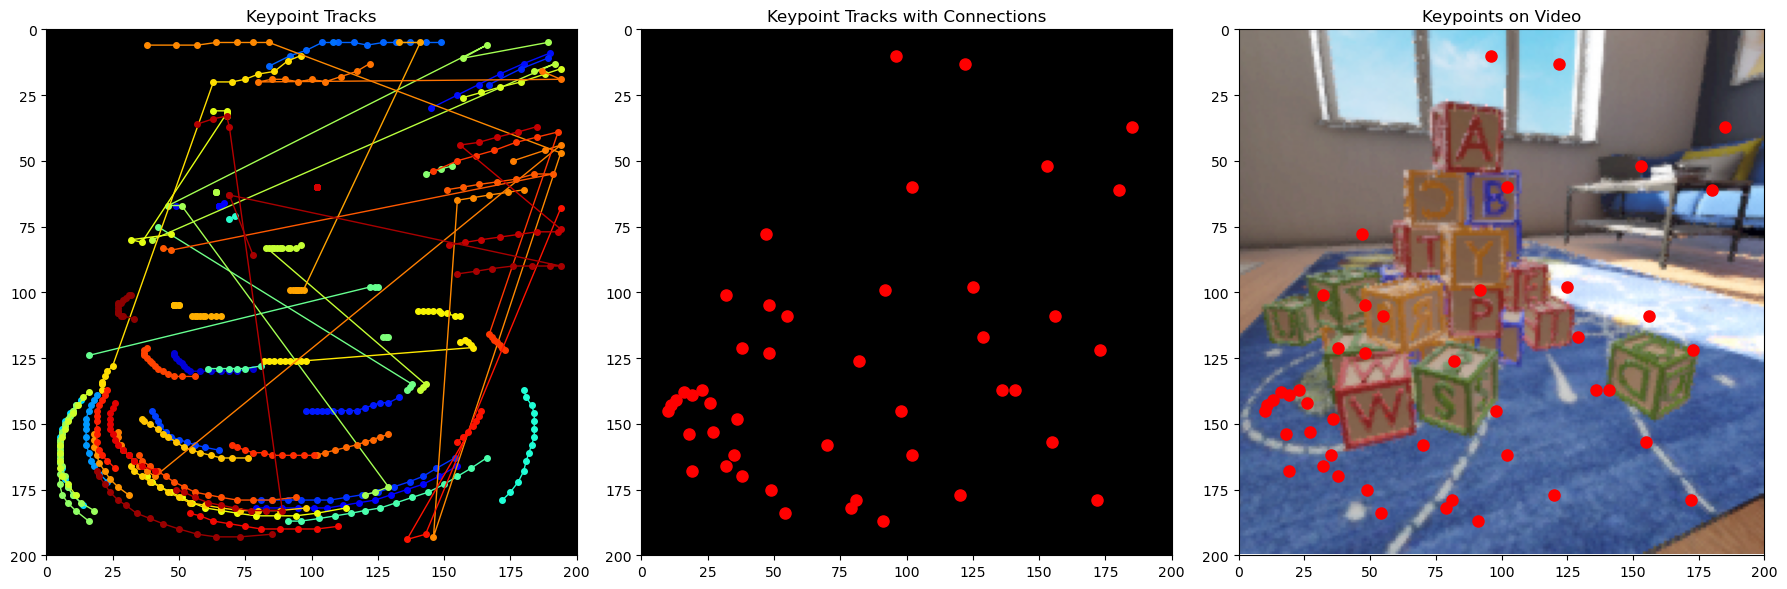

In [29]:
task.matplotlib_visualization(solution, save_at="test.mp4")